# EngageMetrics: Student Performance Predictor

**Use Case:** Predicting student exam scores based on multiple factors (attendance, parental involvement, etc.).

**Dataset Source:** [Kaggle - Student Performance Factors](https://www.kaggle.com/datasets/lainguyn123/student-performance-factors)

**Objective:** Build a machine learning model to predict student exam scores using various engagement metrics.

## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load the cleaned dataset
df = pd.read_csv('student_performance_cleaned.csv')
print(f"Dataset shape: {df.shape}")
print(f"\nDataset info:")
df.info()

Dataset shape: (6378, 20)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6378 entries, 0 to 6377
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6378 non-null   int64 
 1   Attendance                  6378 non-null   int64 
 2   Parental_Involvement        6378 non-null   object
 3   Access_to_Resources         6378 non-null   object
 4   Extracurricular_Activities  6378 non-null   object
 5   Sleep_Hours                 6378 non-null   int64 
 6   Previous_Scores             6378 non-null   int64 
 7   Motivation_Level            6378 non-null   object
 8   Internet_Access             6378 non-null   object
 9   Tutoring_Sessions           6378 non-null   int64 
 10  Family_Income               6378 non-null   object
 11  Teacher_Quality             6378 non-null   object
 12  School_Type                 6378 non-null   object
 13  Peer_In

## 2. Data Exploration and Visualization

In [2]:
# Display basic statistics
print("Dataset Description:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

Dataset Description:
       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6378.000000  6378.000000  6378.000000      6378.000000   
mean       19.977109    80.020853     7.034964        75.066165   
std         5.985460    11.550723     1.468033        14.400389   
min         1.000000    60.000000     4.000000        50.000000   
25%        16.000000    70.000000     6.000000        63.000000   
50%        20.000000    80.000000     7.000000        75.000000   
75%        24.000000    90.000000     8.000000        88.000000   
max        44.000000   100.000000    10.000000       100.000000   

       Tutoring_Sessions  Physical_Activity   Exam_Score  
count        6378.000000        6378.000000  6378.000000  
mean            1.495296           2.972719    67.252117  
std             1.233984           1.028926     3.914217  
min             0.000000           0.000000    55.000000  
25%             1.000000           2.000000    65.000000  
50%             1.000

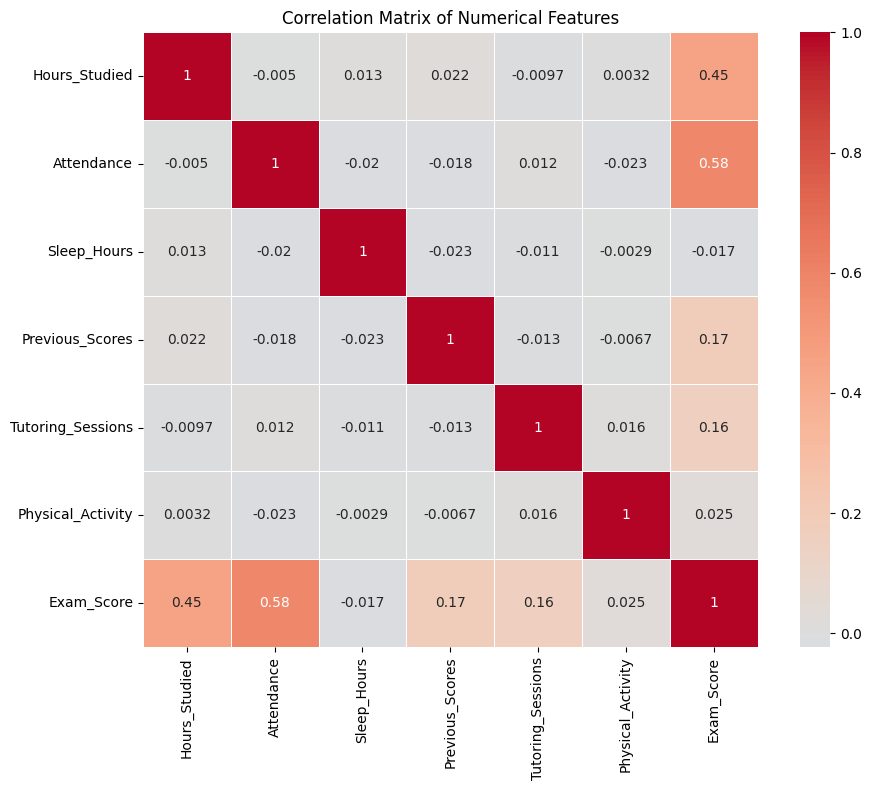

In [3]:
# Correlation heatmap for numerical features
numerical_cols = ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 
                  'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

## 3. Feature Engineering and Preprocessing

In [4]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

# Create a copy for preprocessing
df_processed = df.copy()

# Encode categorical variables
categorical_cols = ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
                   'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
                   'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                   'Parental_Education_Level', 'Distance_from_Home', 'Gender']

label_encoders = {}
for col in categorical_cols:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col])
        label_encoders[col] = le

print("Categorical variables encoded successfully")

Categorical variables encoded successfully


In [5]:
# Select key features for the model based on correlation analysis
selected_features = ['Attendance', 'Parental_Involvement', 'Sleep_Hours', 
                    'Previous_Scores', 'Hours_Studied', 'Tutoring_Sessions', 
                    'Physical_Activity']

X = df_processed[selected_features]
y = df_processed['Exam_Score']

print(f"Selected features: {selected_features}")
print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")

Selected features: ['Attendance', 'Parental_Involvement', 'Sleep_Hours', 'Previous_Scores', 'Hours_Studied', 'Tutoring_Sessions', 'Physical_Activity']
Feature matrix shape: (6378, 7)
Target vector shape: (6378,)


## 4. Data Preprocessing Pipeline

In [6]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

print(f"Training set shape: {X_train_scaled.shape}")
print(f"Test set shape: {X_test_scaled.shape}")

Training set shape: (5102, 7)
Test set shape: (1276, 7)


## 5. Model Training and Evaluation

In [7]:
# Train multiple models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

model_results = {}

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    model_results[name] = {
        'model': model,
        'mse': mse,
        'rmse': np.sqrt(mse),
        'r2': r2,
        'predictions': y_pred
    }
    
    print(f"{name}:")
    print(f"  MSE: {mse:.4f}")
    print(f"  RMSE: {np.sqrt(mse):.4f}")
    print(f"  R²: {r2:.4f}")
    print()

Linear Regression:
  MSE: 5.8617
  RMSE: 2.4211
  R²: 0.6228

Decision Tree:
  MSE: 11.8552
  RMSE: 3.4431
  R²: 0.2371

Random Forest:
  MSE: 6.6980
  RMSE: 2.5880
  R²: 0.5690



## 6. Model Comparison and Selection

Best model: Linear Regression
Best R² score: 0.6228


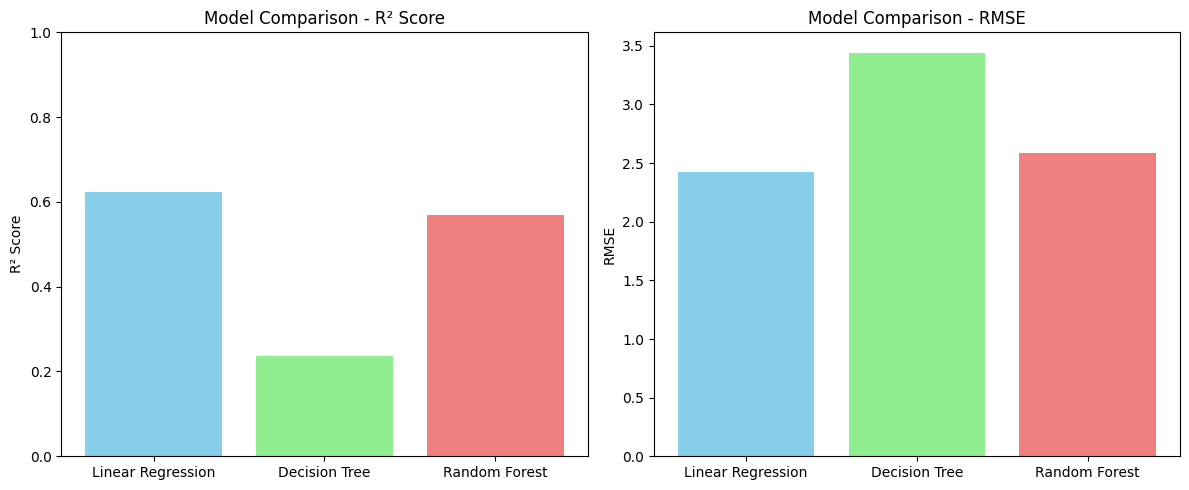

In [8]:
# Find the best model based on R² score
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['r2'])
best_model = model_results[best_model_name]['model']

print(f"Best model: {best_model_name}")
print(f"Best R² score: {model_results[best_model_name]['r2']:.4f}")

# Visualize model comparison
model_names = list(model_results.keys())
r2_scores = [model_results[name]['r2'] for name in model_names]
rmse_scores = [model_results[name]['rmse'] for name in model_names]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# R² scores
ax1.bar(model_names, r2_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax1.set_title('Model Comparison - R² Score')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, 1)

# RMSE scores
ax2.bar(model_names, rmse_scores, color=['skyblue', 'lightgreen', 'lightcoral'])
ax2.set_title('Model Comparison - RMSE')
ax2.set_ylabel('RMSE')

plt.tight_layout()
plt.show()

## 7. Feature Importance Analysis

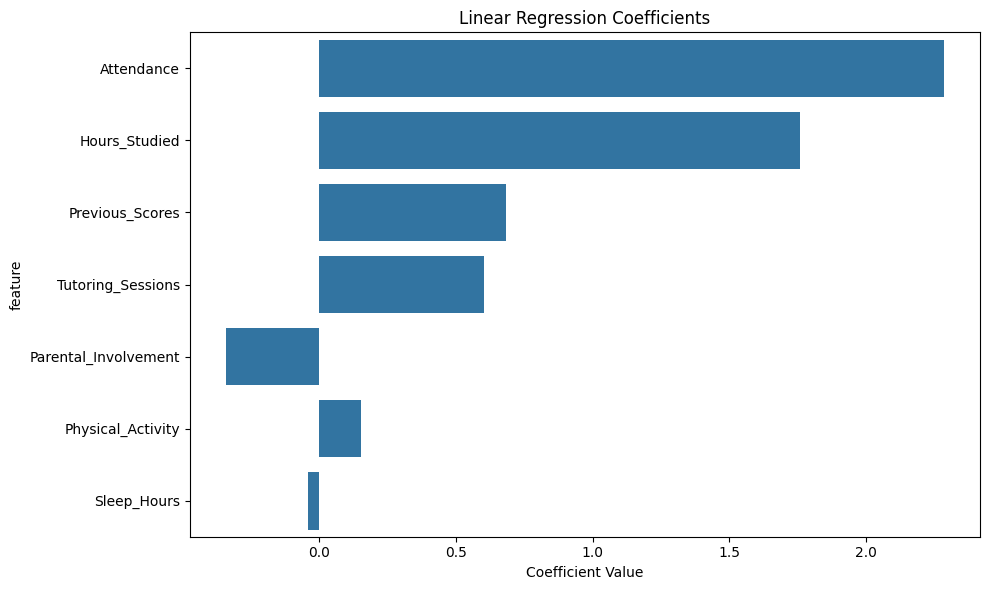

Feature Coefficients:
Attendance: 2.2851
Hours_Studied: 1.7590
Previous_Scores: 0.6831
Tutoring_Sessions: 0.6014
Parental_Involvement: -0.3421
Physical_Activity: 0.1531
Sleep_Hours: -0.0428


In [9]:
# Feature importance for the best model (if it supports it)
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'feature': selected_features,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=feature_importance, x='importance', y='feature')
    plt.title(f'Feature Importance - {best_model_name}')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()
    
    print("Feature Importance Ranking:")
    for idx, row in feature_importance.iterrows():
        print(f"{row['feature']}: {row['importance']:.4f}")
elif best_model_name == 'Linear Regression':
    # For linear regression, show coefficients
    coefficients = pd.DataFrame({
        'feature': selected_features,
        'coefficient': best_model.coef_
    }).sort_values('coefficient', key=abs, ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=coefficients, x='coefficient', y='feature')
    plt.title('Linear Regression Coefficients')
    plt.xlabel('Coefficient Value')
    plt.tight_layout()
    plt.show()
    
    print("Feature Coefficients:")
    for idx, row in coefficients.iterrows():
        print(f"{row['feature']}: {row['coefficient']:.4f}")

## 8. Model Validation and Predictions

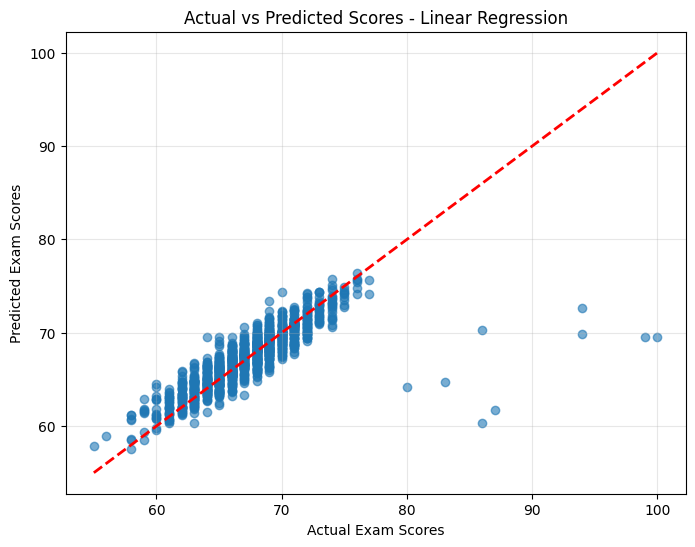

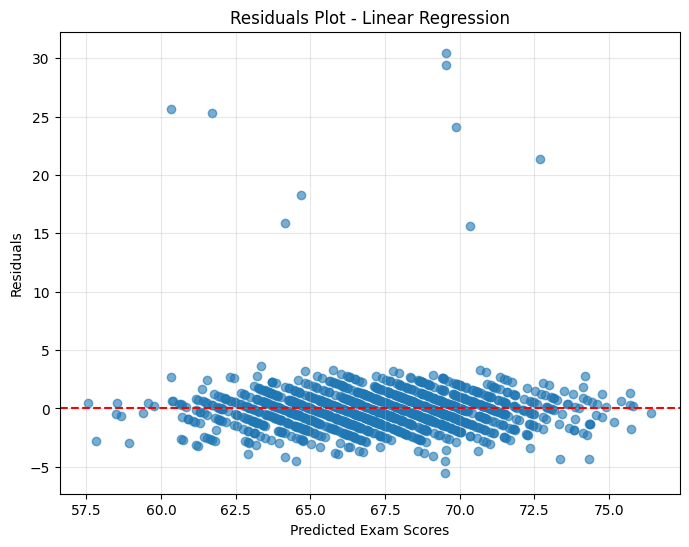

In [10]:
# Prediction vs Actual scatter plot
best_predictions = model_results[best_model_name]['predictions']

plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title(f'Actual vs Predicted Scores - {best_model_name}')
plt.grid(True, alpha=0.3)
plt.show()

# Residuals plot
residuals = y_test - best_predictions
plt.figure(figsize=(8, 6))
plt.scatter(best_predictions, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Exam Scores')
plt.ylabel('Residuals')
plt.title(f'Residuals Plot - {best_model_name}')
plt.grid(True, alpha=0.3)
plt.show()

## 9. Save the Model and Preprocessing Components

In [11]:
# Save the best model, scaler, and imputer
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(imputer, 'imputer.joblib')

print(f"Model saved: {best_model_name}")
print(f"Best model R² score: {model_results[best_model_name]['r2']:.4f}")
print(f"Best model RMSE: {model_results[best_model_name]['rmse']:.4f}")
print("\nFiles saved:")
print("- best_model.joblib")
print("- scaler.joblib")
print("- imputer.joblib")

Model saved: Linear Regression
Best model R² score: 0.6228
Best model RMSE: 2.4211

Files saved:
- best_model.joblib
- scaler.joblib
- imputer.joblib


## 10. Example Prediction

In [12]:
# Example prediction with new data
def predict_exam_score(attendance, parental_involvement, sleep_hours, 
                      previous_scores, hours_studied, tutoring_sessions, 
                      physical_activity):
    """
    Predict exam score based on input features
    
    Parameters:
    - attendance: Attendance percentage (0-100)
    - parental_involvement: Low=0, Medium=1, High=2
    - sleep_hours: Hours of sleep per week
    - previous_scores: Previous exam scores (0-100)
    - hours_studied: Hours studied per week
    - tutoring_sessions: Number of tutoring sessions per week
    - physical_activity: Hours of physical activity per week
    """
    # Create input array
    input_data = np.array([[attendance, parental_involvement, sleep_hours,
                           previous_scores, hours_studied, tutoring_sessions,
                           physical_activity]])
    
    # Apply preprocessing
    input_imputed = imputer.transform(input_data)
    input_scaled = scaler.transform(input_imputed)
    
    # Make prediction
    prediction = best_model.predict(input_scaled)[0]
    
    return prediction

# Example usage
example_score = predict_exam_score(
    attendance=95,
    parental_involvement=2,  # High
    sleep_hours=56,
    previous_scores=88,
    hours_studied=10,
    tutoring_sessions=1,
    physical_activity=3
)

print(f"Example prediction: {example_score:.2f}")
print("\nInput features:")
print(f"- Attendance: 95%")
print(f"- Parental Involvement: High (2)")
print(f"- Sleep Hours: 56 hours/week")
print(f"- Previous Scores: 88")
print(f"- Hours Studied: 10 hours/week")
print(f"- Tutoring Sessions: 1 session/week")
print(f"- Physical Activity: 3 hours/week")

Example prediction: 65.94

Input features:
- Attendance: 95%
- Parental Involvement: High (2)
- Sleep Hours: 56 hours/week
- Previous Scores: 88
- Hours Studied: 10 hours/week
- Tutoring Sessions: 1 session/week
- Physical Activity: 3 hours/week


c:\Users\perle\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
